# 一、数据预处理
把事件与数据表的序号一一对应<br>跳过一些损坏了的文档

In [1]:
import pandas as pd
import os

In [2]:
total_table_path = r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据集序号和事件对应表.xlsx"
total_df = pd.read_excel(total_table_path)

In [3]:
total_df

,序号,事件,热度,起始时间
0,1,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00
1,2,2022年全国高考,54.37,2022-05-14 00:00:00
2,3,国内成品油价格已进行22轮调整,46.03,2022-01-01 00:00:00
3,4,中国空间站建造任务稳步推进,42.78,2022-01-01 00:00:00
4,5,2022年春晚,32.03,2022-01-01 00:00:00
...,...,...,...,...
3915,3996,台湾岛内首度检出具微量辐射产品,0.06,2022-09-13 13:46:06
3916,3997,“中国天眼”探测到快速射电暴密近环境的动态演化,0.06,2022-09-20 14:14:24
3917,3998,成都警方通报“一男一女拦截奥迪车”,0.06,2022-11-11 11:43:51
3918,3999,深圳龙岗区引进专精特新企业,0.05,2022-10-31 14:43:29


In [4]:
all_data_df = pd.DataFrame()

In [5]:
documents_folder = r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据"

In [6]:
for filename in os.listdir(documents_folder):
    file_path = os.path.join(documents_folder,filename)
    
    try:
        if os.path.isfile(file_path) and filename.endswith('.xlsx'):
            document_df = pd.read_excel(file_path)
            all_data_df = pd.concat([all_data_df,document_df],ignore_index=True)
    except Exception as e:
        print(f"Error reading file {file_path}:{e}")
        continue

print(all_data_df.head())

Error reading file F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据\104.xlsx:unpack requires a buffer of 4 bytes
Error reading file F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据\136.xlsx:unpack requires a buffer of 4 bytes
Error reading file F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据\1375.xlsx:unpack requires a buffer of 4 bytes
Error reading file F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据\1502.xlsx:
Error reading file F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据\1732.xlsx:
Error reading file F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据\1757.xlsx:
Error reading file F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据\1864.xlsx:'utf-16-le' codec can't decode bytes in position 888-889: illegal encoding
Error reading file F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据\2795.xlsx:
Error reading file F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据\2906.xlsx:unpack requires a buffer of 4 bytes
Error reading file F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据\297.xlsx:unpack requires a buffer of 2 bytes
Error reading file F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据\3732.xlsx:'utf-16-le' codec can't decode bytes in position 888-889: illegal encoding
Error reading file F

In [7]:
all_data_df

,检索ID,标题/微博内容,全文内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,1,//@X玖少年团肖战DAYTOY:期待冬奥赛场上的那抹中国红！奥运健儿，加油！#今日立春冬奥开幕#,//@X玖少年团肖战DAYTOY:期待冬奥赛场上的那抹中国红！奥运健儿，加油！#今日立春冬奥...,0,0,0,69f298cda961436a19a55ade124c9a14,1373,1571,广东
1,1,恭喜@小呆子918 1名用户获得【测试一下】。C官方唯一抽奖工具@C抽奖平台 对本次抽奖进行...,恭喜@小呆子918 1名用户获得【测试一下】。C官方唯一抽奖工具@C抽奖平台 对本次抽奖进行...,0,0,0,7a37d22725d2a807d0515ad17f4c59d1,774,1293,北京
2,1,转发C,转发C【原C】【#冬奥来啦#—#时代少年团最美中国画#】 “喝中国茶，看中国画”由@时代少年...,0,0,0,cb45856f3c39c6e6c574f61575575913,0,109,浙江
3,1,//@我应该是没机会吧_:一起为奥运健儿加油[赢牛奶]//@TNT时代少年团后援会官博:#时...,//@我应该是没机会吧_:一起为奥运健儿加油[赢牛奶]//@TNT时代少年团后援会官博:#时...,0,0,0,07673de0c35100bec7cd94233de7cc16,33,136,香港
4,1,[开学季]//@-小丸不能掉队-://@-愛意寄予日落:😡//@-愛意寄予日落://@文轩星...,[开学季]//@-小丸不能掉队-://@-愛意寄予日落:😡//@-愛意寄予日落://@文轩星...,0,0,0,a3fabba3c22581c93ae75712dace4efa,641,36,江苏
...,...,...,...,...,...,...,...,...,...,...
2291942,999,（报告出品方/作者：国金证券，樊志远，刘妍雪，邓小路） 一、消费电子，2023年有望前...,（报告出品方/作者：国金证券，樊志远，刘妍雪，邓小路） 一、消费电子，2023年有望前...,0,0,0,35bd8880a6bd6f71f824d1360feea4bb,0,0,其他
2291943,999,（报告出品方：华泰证券） 行业保持较快增长，锂电资源环节受益明显 9M2022 电...,（报告出品方：华泰证券） 行业保持较快增长，锂电资源环节受益明显 9M2022 电...,0,0,0,NaN,0,0,北京
2291944,999,【今日导读】 总局发布5G频道技术白皮书 电视行业或迎变革 ...,【今日导读】 总局发布5G频道技术白皮书 电视行业或迎变革 ...,4,0,0,ee7afba9cc180efb01aee21882d7ed1d,0,0,其他
2291945,999,中国经济新观察 新华社记者 2022年07月16日05:25 | 来源： 人民网－...,中国经济新观察 新华社记者 2022年07月16日05:25 | 来源： 人民网－...,0,0,0,0998dae4c26f7de85f30677873c3999f,0,0,其他


In [ ]:
print(all_data_df.columns)

In [8]:
merged_df = pd.merge(all_data_df, total_df, left_on="检索ID", right_on="序号", how="left")

In [9]:
merged_df

,检索ID,标题/微博内容,全文内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域,序号,事件,热度,起始时间
0,1,//@X玖少年团肖战DAYTOY:期待冬奥赛场上的那抹中国红！奥运健儿，加油！#今日立春冬奥开幕#,//@X玖少年团肖战DAYTOY:期待冬奥赛场上的那抹中国红！奥运健儿，加油！#今日立春冬奥...,0,0,0,69f298cda961436a19a55ade124c9a14,1373,1571,广东,1.0,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00
1,1,恭喜@小呆子918 1名用户获得【测试一下】。C官方唯一抽奖工具@C抽奖平台 对本次抽奖进行...,恭喜@小呆子918 1名用户获得【测试一下】。C官方唯一抽奖工具@C抽奖平台 对本次抽奖进行...,0,0,0,7a37d22725d2a807d0515ad17f4c59d1,774,1293,北京,1.0,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00
2,1,转发C,转发C【原C】【#冬奥来啦#—#时代少年团最美中国画#】 “喝中国茶，看中国画”由@时代少年...,0,0,0,cb45856f3c39c6e6c574f61575575913,0,109,浙江,1.0,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00
3,1,//@我应该是没机会吧_:一起为奥运健儿加油[赢牛奶]//@TNT时代少年团后援会官博:#时...,//@我应该是没机会吧_:一起为奥运健儿加油[赢牛奶]//@TNT时代少年团后援会官博:#时...,0,0,0,07673de0c35100bec7cd94233de7cc16,33,136,香港,1.0,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00
4,1,[开学季]//@-小丸不能掉队-://@-愛意寄予日落:😡//@-愛意寄予日落://@文轩星...,[开学季]//@-小丸不能掉队-://@-愛意寄予日落:😡//@-愛意寄予日落://@文轩星...,0,0,0,a3fabba3c22581c93ae75712dace4efa,641,36,江苏,1.0,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291942,999,（报告出品方/作者：国金证券，樊志远，刘妍雪，邓小路） 一、消费电子，2023年有望前...,（报告出品方/作者：国金证券，樊志远，刘妍雪，邓小路） 一、消费电子，2023年有望前...,0,0,0,35bd8880a6bd6f71f824d1360feea4bb,0,0,其他,999.0,上半年我国物流运行企稳回升,0.55,2022-07-25 11:33:41
2291943,999,（报告出品方：华泰证券） 行业保持较快增长，锂电资源环节受益明显 9M2022 电...,（报告出品方：华泰证券） 行业保持较快增长，锂电资源环节受益明显 9M2022 电...,0,0,0,NaN,0,0,北京,999.0,上半年我国物流运行企稳回升,0.55,2022-07-25 11:33:41
2291944,999,【今日导读】 总局发布5G频道技术白皮书 电视行业或迎变革 ...,【今日导读】 总局发布5G频道技术白皮书 电视行业或迎变革 ...,4,0,0,ee7afba9cc180efb01aee21882d7ed1d,0,0,其他,999.0,上半年我国物流运行企稳回升,0.55,2022-07-25 11:33:41
2291945,999,中国经济新观察 新华社记者 2022年07月16日05:25 | 来源： 人民网－...,中国经济新观察 新华社记者 2022年07月16日05:25 | 来源： 人民网－...,0,0,0,0998dae4c26f7de85f30677873c3999f,0,0,其他,999.0,上半年我国物流运行企稳回升,0.55,2022-07-25 11:33:41


# 二、提取特征

- **1.微博内容点赞转发评论字数特征**

In [10]:
# 处理空值（NaN）
merged_df['全文内容'] = merged_df['全文内容'].fillna('')  # 将空值替换为空字符串

# 将文本字数添加到DataFrame
merged_df['文本字数'] = merged_df['全文内容'].apply(len)

In [11]:
selected_columns = ['检索ID','点赞','转发','评论','文本字数']

In [12]:
agg_df = merged_df[selected_columns].groupby('检索ID').agg({
    '点赞':['sum','mean','max'],
    '转发':['sum','mean','max'],
    '评论':['sum','mean','max'],
    '文本字数':['mean','median']
}).reset_index()

In [13]:
agg_df.columns = ['检索ID', 
                  '点赞总和', '点赞均值', '点赞最大值',
                  '转发总和', '转发均值', '转发最大值',
                  '评论总和', '评论均值', '评论最大值',
                  '文本字数均值', '文本字数中位数']

In [14]:
agg_df

,检索ID,点赞总和,点赞均值,点赞最大值,转发总和,转发均值,转发最大值,评论总和,评论均值,评论最大值,文本字数均值,文本字数中位数
0,1,0,0.000000,0,96,0.048000,51,448,0.224000,48,139.406000,100.0
1,2,17,0.008500,17,26,0.013000,10,1327,0.663500,115,172.749500,101.0
2,3,1,0.000597,1,119,0.071087,48,813,0.485663,76,348.138590,167.5
3,4,0,0.000000,0,57,0.057000,19,209,0.209000,159,234.201000,158.0
4,5,0,0.000000,0,8,0.008000,2,791,0.791000,212,178.081000,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3897,3995,0,0.000000,0,1,0.001000,1,551,0.551000,20,78.560000,53.0
3898,3996,0,0.000000,0,6,0.026316,3,98,0.429825,29,237.451754,119.5
3899,3997,0,0.000000,0,5,0.038760,3,7,0.054264,2,348.418605,180.0
3900,3998,0,0.000000,0,3,0.025424,2,47,0.398305,15,193.203390,129.5


In [26]:
output_path = r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\点赞转发评论字数特征.csv"
agg_df.to_csv(output_path,index=False)

- **2.微博内容特征**

In [16]:
import re

In [22]:
context_df = pd.DataFrame()
context_df['检索ID'] = merged_df['检索ID']
context_df['emoji数量'] = merged_df['全文内容'].apply(lambda x: len(re.findall(r'[\U00010000-\U0010ffff]', x)))  # 匹配 emoji
context_df['微博表情数量'] = merged_df['全文内容'].apply(lambda x: len(re.findall(r'\[.*?\]', x)))  # 匹配微博表情
context_df['超话数量'] = merged_df['全文内容'].apply(lambda x: len(re.findall(r'#.*?#', x)))  # 匹配超话
context_df['标签数量'] = merged_df['全文内容'].apply(lambda x: len(re.findall(r'@.*?\s', x)))  # 匹配标签
context_df['URL数量'] = merged_df['全文内容'].apply(lambda x: len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x)))  # 匹配URL
context_df['@用户数量'] = merged_df['全文内容'].apply(lambda x: len(re.findall(r'@.*?\s', x)))  # 匹配@用户
context_df['感叹号数量'] = merged_df['全文内容'].apply(lambda x: len(re.findall(r'!', x)))  # 匹配感叹号
context_df['问号数量'] = merged_df['全文内容'].apply(lambda x: len(re.findall(r'\?', x)))  # 匹配问号
context_df['数字数量'] = merged_df['全文内容'].apply(lambda x: len(re.findall(r'\d', x)))  # 匹配数字

In [23]:
context_df

,检索ID,emoji数量,微博表情数量,超话数量,标签数量,URL数量,@用户数量,感叹号数量,问号数量,数字数量
0,1,0,1,4,1,0,1,0,0,12
1,1,0,0,2,2,2,2,0,0,13
2,1,0,0,3,2,1,2,0,0,6
3,1,1,5,7,11,2,11,0,0,8
4,1,1,1,1,7,0,7,0,0,10
...,...,...,...,...,...,...,...,...,...,...
2291942,999,0,0,0,0,0,0,0,0,141
2291943,999,0,0,0,0,0,0,0,0,157
2291944,999,0,0,0,0,0,0,0,0,17
2291945,999,0,0,0,0,0,0,0,0,38


In [20]:
print(context_df.columns)

Index(['emoji数量', '微博表情数量', '超话数量', '标签数量', 'URL数量', '@用户数量', '感叹号数量', '问号数量',
       '数字数量'],
      dtype='object')


In [24]:
# 定义需要统计的特征列
selected_columns = ['检索ID', 'emoji数量', '微博表情数量', '超话数量', '标签数量', 'URL数量', '@用户数量', '感叹号数量', '问号数量',
       '数字数量']

# 按照微博事件（检索ID）分组并计算各种特征
event_agg_df = context_df[selected_columns].groupby('检索ID').agg({
    'emoji数量': ['sum', 'mean', 'max'],
    '微博表情数量': ['sum', 'mean', 'max'],
    '超话数量': ['sum', 'mean', 'max'],
    '标签数量': ['sum', 'mean', 'max'],
    'URL数量': ['sum', 'mean', 'max'],
    '@用户数量': ['sum', 'mean', 'max'],
    '感叹号数量': ['sum', 'mean', 'max'],
    '问号数量': ['sum', 'mean', 'max'],
    '数字数量': ['sum', 'mean', 'max'],
}).reset_index()

In [25]:
event_agg_df

检索ID emoji数量               微博表情数量                超话数量                \
               sum      mean max    sum      mean max   sum      mean max   
0        1     833  0.416500  57   1978  0.989000  31  3761  1.880500  69   
1        2     386  0.193000  18   1390  0.695000  12  3073  1.536500  18   
2        3     102  0.060932  12    938  0.560335  35  1899  1.134409  20   
3        4     291  0.291000  23    904  0.904000  19  1587  1.587000  11   
4        5     653  0.653000  92   1952  1.952000  21  3066  3.066000  16   
...    ...     ...       ...  ..    ...       ...  ..   ...       ...  ..   
3897  3995      46  0.046000   3    618  0.618000  26  1099  1.099000  19   
3898  3996      35  0.153509   8    154  0.675439  13   322  1.412281  14   
3899  3997      26  0.201550   6     56  0.434109  10   235  1.821705  14   
3900  3998       3  0.025424   2     40  0.338983   5   164  1.389831   4   
3901  3999       0  0.000000   0      0  0.000000   0     0  0.000000   0   

      ... @用户数量 感叹号数量               问号数量                 数字数量                  
      ...   max   sum      mean max  sum      mean max    sum       mean  max  
0     ...    36    22  0.011000   4   19  0.009500   3   6917   3.458500  132  
1     ...    47    46  0.023000  23   10  0.005000   4  13267   6.633500  193  
2     ...    45     8  0.004779   1   19  0.011350   2  31481  18.805854  281  
3     ...    39    14  0.014000   2    9  0.009000   3   8863   8.863000  172  
4     ...    50    11  0.011000   2    1  0.001000   1   9125   9.125000  201  
...   ...   ...   ...       ...  ..  ...       ...  ..    ...        ...  ...  
3897  ...    11     2  0.002000   1   15  0.015000   4    771   0.771000   53  
3898  ...     5     1  0.004386   1    3  0.013158   2   3335  14.627193  128  
3899  ...     1     1  0.007752   1    0  0.000000   0   2924  22.666667  167  
3900  ...     2     0  0.000000   0    1  0.008475   1    800   6.779661   63  
3901  ...     2     2  0.200000   2    1  0.100000   1    587  58.700000  110  

[3902 rows x 28 columns]

- **3.微博文本内容情感特征**
<br>大连理工大学情感本体库词典

In [27]:
output_path = r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\文本内容特征.csv"
event_agg_df.to_csv(output_path,index=False)

In [3]:
import pandas as pd
emotion_df = pd.read_excel(r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\情感词汇.xlsx", keep_default_na = False)

In [4]:
Happy = []
Good = []
Surprise = []
Anger = []
Sad = []
Fear = []
Disgust = []
for idx, row in emotion_df.iterrows():
    if row['情感分类'] in ['PA', 'PE']:
        Happy.append(row['词语'])
    if row['情感分类'] in ['PD', 'PH', 'PG', 'PB', 'PK']:
        Good.append(row['词语']) 
    if row['情感分类'] in ['PC']:
        Surprise.append(row['词语'])     
    if row['情感分类'] in ['NV']:
        Anger.append(row['词语'])    
    if row['情感分类'] in ['NB', 'NJ', 'NH', 'PF']:
        Sad.append(row['词语'])
    if row['情感分类'] in ['NI', 'NC', 'NG']:
        Fear.append(row['词语'])
    if row['情感分类'] in ['NE', 'ND', 'NN', 'NK', 'NL']:
        Disgust.append(row['词语'])
Positive = Happy + Good +Surprise
Negative = Anger + Sad + Fear + Disgust
print('情绪词语列表整理完成') 

情绪词语列表整理完成


In [24]:
import os
import pandas as pd

# 文件夹路径
folder_path = r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据"

# 存储文件的文本内容的文件夹路径
output_folder_path = r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\情感分析文本数据"
os.makedirs(output_folder_path, exist_ok=True)

# 遍历文件夹中的Excel文件
for batch_count, file_name in enumerate(os.listdir(folder_path), start=1):
    if file_name.endswith('.xlsx') or file_name.endswith('.xls'):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # 读取Excel文件
            singer_df = pd.read_excel(file_path)
            
            # 提取“全文内容”列的文本
            if '全文内容' in singer_df.columns:
                text_content = ' '.join(singer_df['全文内容'].astype(str))
                
                # 将文本内容写入文件
                output_file_path = os.path.join(output_folder_path, f'{file_name.replace(".xlsx", "").replace(".xls", "")}.txt')
                with open(output_file_path, 'w', encoding='utf-8') as output_file:
                    output_file.write(f'文件名: {file_name}, 文本内容: {text_content}\n')
                
            else:
                print(f'文件 "{file_name}" 中没有全文内容列。')

        except Exception as e:
            print(f'读取文件 "{file_name}" 时发生错误: {str(e)}')
            # 如果发生错误，跳过当前文件

# 打印批次计数器
print(f'总共处理了 {batch_count} 批文件。')


读取文件 "104.xlsx" 时发生错误: unpack requires a buffer of 4 bytes
读取文件 "136.xlsx" 时发生错误: unpack requires a buffer of 4 bytes
读取文件 "1375.xlsx" 时发生错误: unpack requires a buffer of 4 bytes
读取文件 "1502.xlsx" 时发生错误: 
读取文件 "1732.xlsx" 时发生错误: 
读取文件 "1757.xlsx" 时发生错误: 
读取文件 "1864.xlsx" 时发生错误: 'utf-16-le' codec can't decode bytes in position 888-889: illegal encoding
读取文件 "2795.xlsx" 时发生错误: 
读取文件 "2906.xlsx" 时发生错误: unpack requires a buffer of 4 bytes
读取文件 "297.xlsx" 时发生错误: unpack requires a buffer of 2 bytes
读取文件 "3732.xlsx" 时发生错误: 'utf-16-le' codec can't decode bytes in position 888-889: illegal encoding
读取文件 "3989.xlsx" 时发生错误: unpack requires a buffer of 2 bytes
读取文件 "490.xlsx" 时发生错误: unpack requires a buffer of 4 bytes
读取文件 "639.xlsx" 时发生错误: 'utf-16-le' codec can't decode bytes in position 4-5: illegal encoding
读取文件 "914.xlsx" 时发生错误: unpack requires a buffer of 4 bytes
总共处理了 3920 批文件。


In [5]:
import jieba
import time
def emotion_caculate(text):
    positive = 0
    negative = 0
    anger = 0
    disgust = 0
    fear = 0
    sad = 0
    surprise = 0
    good = 0
    happy = 0
    wordlist = jieba.lcut(text)
    wordset = set(wordlist)
    wordfreq = []
    for word in wordset:
        freq = wordlist.count(word)
        if word in Positive:
            positive+=freq
        if word in Negative:
            negative+=freq
        if word in Anger:
            anger+=freq
        if word in Disgust:
            disgust+=freq
        if word in Fear:
            fear+=freq
        if word in Sad:
            sad+=freq
        if word in Surprise:
            surprise+=freq
        if word in Good:
            good+=freq
        if word in Happy:
            happy+=freq
    emotion_info = {
        'length':len(wordlist),
        'positive': positive,
        'negative': negative,
        'anger': anger,
        'disgust': disgust,
        'fear':fear,
        'good':good,
        'sadness':sad,
        'surprise':surprise,
        'happy':happy,
    }
    indexs = ['length', 'positive', 'negative', 'anger', 'disgust','fear','sadness','surprise', 'good', 'happy']
    return pd.Series(emotion_info, index=indexs)

In [6]:
test = r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\情感分析文本数据\batch_0.txt"

In [ ]:
emotion_caculate(test)

In [34]:
import os
import pandas as pd

# 源文件夹和目标文件夹路径
source_folder = r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\情感分析文本数据"
target_folder = r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\情感分析结果"

# 获取源文件夹中的所有 txt 文件
files_to_process = [filename for filename in os.listdir(source_folder) if filename.endswith(".txt")]

# 对文件名进行排序
sorted_files = sorted(files_to_process)

# 按照需求定义处理的范围
start_index = 2500
end_index = 3905  # 这里可以根据需要调整

# 遍历指定范围的 txt 文件
for filename in sorted_files[start_index:end_index]:
    file_path = os.path.join(source_folder, filename)
    
    # 读取文本内容
    with open(file_path, 'r', encoding='utf-8') as file:
        text_content = file.read()
    
    # 进行情感分析
    result = emotion_caculate(text_content)
    
    # 构建保存结果的 DataFrame
    result_df = pd.DataFrame(result).transpose()
    
    # 获取源文件夹中的文件名（包括扩展名）
    base_filename = os.path.basename(file_path)
    
    # 构建目标文件路径，保持与原文件名一致
    target_file_path = os.path.join(target_folder, base_filename)
    
    # 将原文件名的扩展名替换为 "_result.txt"
    target_file_path = os.path.splitext(target_file_path)[0] + "_result.txt"
    
    # 保存结果到目标文件
    result_df.to_csv(target_file_path, sep='\t', index=False)


- 4.微博文本内容道德特征<br>中文道德词典（C-FMD2.0）

In [1]:
import cmfd

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\BITTER~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.501 seconds.
Prefix dict has been built successfully.


In [2]:
text_test = '''她一见他就倾心， 但他却偏要为非作歹。结果两人败俱伤， 她心碎， 他惨遭报应。 他本来是一个英勇战斗的将军， 但因为一纸空文， 被诬陷入狱。再加上尔虞我诈的诡计， 他最终丧失了自己的荣誉和尊严。 他曾认为自己是无所不能， 却不知道一念之间， 一切都会化为乌有。如果他当初没有欺骗她， 如果他当初没有撕毁那张契约， 也许他们现在还在幸福的生活中。 现在， 他身陷囹圄， 只能思念那些曾经的日子。他懊悔不已， 只能悔恨自己的软弱和自私。他希望能有机会改正错误， 重新取回自己的荣誉， 但现实却是那么残酷。'''

In [3]:
result = cmfd.moral_quantity(text_test, duplicate=False, with_word=True)
print(result) 

{('altr',): {'num': 0.0, 'word': ''}, ('auth',): {'num': 0.21428571428571427, 'word': '都会;将军;荣誉'}, ('care',): {'num': 0.2857142857142857, 'word': '心碎;为非作歹;残酷;惨遭'}, ('dili',): {'num': 0.0, 'word': ''}, ('fair',): {'num': 0.2857142857142857, 'word': '尔虞我诈;报应;一纸空文;欺骗'}, ('general',): {'num': 0.07142857142857142, 'word': '幸福'}, ('libe',): {'num': 0.0, 'word': ''}, ('loya',): {'num': 0.07142857142857142, 'word': '英勇战斗'}, ('mode',): {'num': 0.0, 'word': ''}, ('resi',): {'num': 0.0, 'word': ''}, ('sanc',): {'num': 0.07142857142857142, 'word': '尊严'}, ('wast',): {'num': 0.0, 'word': ''}}


In [13]:
import os

def sentiment_analysis_with_cmfd(text):
    # 在这里直接使用 cmfd.moral_quantity 函数进行情感分析
    # 注意：这里的 cmfd.moral_quantity 函数需要接受文本输入并返回情感分析的结果
    result = cmfd.moral_quantity(text, duplicate=False, with_word=True)
    return result

def extract_number_from_filename(filename):
    # 从文件名中提取数字部分
    return int(''.join(filter(str.isdigit, filename)))

# 源文件夹和目标文件夹路径
source_folder = r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\情感分析文本数据"
target_folder = r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\道德结果"

# 获取源文件夹中的所有 txt 文件
files_to_process = [filename for filename in os.listdir(source_folder) if filename.endswith(".txt")]

# 对文件名进行排序
sorted_files = sorted(files_to_process, key=extract_number_from_filename)

start_index = 3000
end_index = 4000

# 遍历指定范围的 txt 文件
for filename in sorted_files[start_index:end_index]:
    file_path = os.path.join(source_folder, filename)
    
    # 读取文本内容
    with open(file_path, 'r', encoding='utf-8') as file:
        text_content = file.read()
    
    # 进行情感分析，使用 cmfd.moral_quantity 函数
    result = sentiment_analysis_with_cmfd(text_content)
    
    # 获取源文件夹中的文件名（包括扩展名）
    base_filename = os.path.basename(file_path)
    
    # 构建目标文件路径，保持与原文件名一致
    target_file_path = os.path.join(target_folder, base_filename)
    
    # 将原文件名的扩展名替换为 "_result.txt"
    target_file_path = os.path.splitext(target_file_path)[0] + "_result.txt"
    
    # 保存结果到目标文件
    with open(target_file_path, 'w', encoding='utf-8') as result_file:
        result_file.write(str(result))


# 三、整合特征形成dataframe

In [18]:
import pandas as pd

# 读取两个 CSV 文件
file1 = r'F:\结课作业\选题二训练集：热点事件的发展趋势预测\文本内容特征.csv'
file2 = r'F:\结课作业\选题二训练集：热点事件的发展趋势预测\点赞转发评论字数特征.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)


# 使用 merge 合并两个 DataFrame
merged_df = pd.merge(df1, df2, how='outer', on='检索ID')


In [16]:
df1

,检索ID,emoji数量,emoji数量.1,emoji数量.2,微博表情数量,微博表情数量.1,微博表情数量.2,超话数量,超话数量.1,超话数量.2,...,@用户数量.2,感叹号数量,感叹号数量.1,感叹号数量.2,问号数量,问号数量.1,问号数量.2,数字数量,数字数量.1,数字数量.2
0,NaN,sum,mean,max,sum,mean,max,sum,mean,max,...,max,sum,mean,max,sum,mean,max,sum,mean,max
1,1.0,833,0.4165,57,1978,0.989,31,3761,1.8805,69,...,36,22,0.011,4,19,0.0095,3,6917,3.4585,132
2,2.0,386,0.193,18,1390,0.695,12,3073,1.5365,18,...,47,46,0.023,23,10,0.005,4,13267,6.6335,193
3,3.0,102,0.06093189964157706,12,938,0.5603345280764636,35,1899,1.1344086021505377,20,...,45,8,0.0047789725209080045,1,19,0.011350059737156512,2,31481,18.805854241338114,281
4,4.0,291,0.291,23,904,0.904,19,1587,1.587,11,...,39,14,0.014,2,9,0.009,3,8863,8.863,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,3995.0,46,0.046,3,618,0.618,26,1099,1.099,19,...,11,2,0.002,1,15,0.015,4,771,0.771,53
3899,3996.0,35,0.15350877192982457,8,154,0.6754385964912281,13,322,1.412280701754386,14,...,5,1,0.0043859649122807015,1,3,0.013157894736842105,2,3335,14.62719298245614,128
3900,3997.0,26,0.20155038759689922,6,56,0.43410852713178294,10,235,1.821705426356589,14,...,1,1,0.007751937984496124,1,0,0.0,0,2924,22.666666666666668,167
3901,3998.0,3,0.025423728813559324,2,40,0.3389830508474576,5,164,1.3898305084745763,4,...,2,0,0.0,0,1,0.00847457627118644,1,800,6.779661016949152,63


In [17]:
df2

,检索ID,点赞总和,点赞均值,点赞最大值,转发总和,转发均值,转发最大值,评论总和,评论均值,评论最大值,文本字数均值,文本字数中位数
0,1,0,0.000000,0,96,0.048000,51,448,0.224000,48,139.406000,100.0
1,2,17,0.008500,17,26,0.013000,10,1327,0.663500,115,172.749500,101.0
2,3,1,0.000597,1,119,0.071087,48,813,0.485663,76,348.138590,167.5
3,4,0,0.000000,0,57,0.057000,19,209,0.209000,159,234.201000,158.0
4,5,0,0.000000,0,8,0.008000,2,791,0.791000,212,178.081000,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3897,3995,0,0.000000,0,1,0.001000,1,551,0.551000,20,78.560000,53.0
3898,3996,0,0.000000,0,6,0.026316,3,98,0.429825,29,237.451754,119.5
3899,3997,0,0.000000,0,5,0.038760,3,7,0.054264,2,348.418605,180.0
3900,3998,0,0.000000,0,3,0.025424,2,47,0.398305,15,193.203390,129.5


In [19]:
merged_df

,检索ID,emoji数量,emoji数量.1,emoji数量.2,微博表情数量,微博表情数量.1,微博表情数量.2,超话数量,超话数量.1,超话数量.2,...,点赞均值,点赞最大值,转发总和,转发均值,转发最大值,评论总和,评论均值,评论最大值,文本字数均值,文本字数中位数
0,NaN,sum,mean,max,sum,mean,max,sum,mean,max,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,833,0.4165,57,1978,0.989,31,3761,1.8805,69,...,0.000000,0.0,96.0,0.048000,51.0,448.0,0.224000,48.0,139.406000,100.0
2,2.0,386,0.193,18,1390,0.695,12,3073,1.5365,18,...,0.008500,17.0,26.0,0.013000,10.0,1327.0,0.663500,115.0,172.749500,101.0
3,3.0,102,0.06093189964157706,12,938,0.5603345280764636,35,1899,1.1344086021505377,20,...,0.000597,1.0,119.0,0.071087,48.0,813.0,0.485663,76.0,348.138590,167.5
4,4.0,291,0.291,23,904,0.904,19,1587,1.587,11,...,0.000000,0.0,57.0,0.057000,19.0,209.0,0.209000,159.0,234.201000,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,3995.0,46,0.046,3,618,0.618,26,1099,1.099,19,...,0.000000,0.0,1.0,0.001000,1.0,551.0,0.551000,20.0,78.560000,53.0
3899,3996.0,35,0.15350877192982457,8,154,0.6754385964912281,13,322,1.412280701754386,14,...,0.000000,0.0,6.0,0.026316,3.0,98.0,0.429825,29.0,237.451754,119.5
3900,3997.0,26,0.20155038759689922,6,56,0.43410852713178294,10,235,1.821705426356589,14,...,0.000000,0.0,5.0,0.038760,3.0,7.0,0.054264,2.0,348.418605,180.0
3901,3998.0,3,0.025423728813559324,2,40,0.3389830508474576,5,164,1.3898305084745763,4,...,0.000000,0.0,3.0,0.025424,2.0,47.0,0.398305,15.0,193.203390,129.5


In [26]:
import pandas as pd

# 读取 Excel 文件和 DataFrame
excel_file = r'F:\结课作业\选题二训练集：热点事件的发展趋势预测\数据集序号和事件对应表.xlsx'
df = merged_df

# 读取 Excel 文件中的数据
excel_data = pd.read_excel(excel_file)

# 使用 concat 合并两个 DataFrame
new_df = pd.merge(excel_data, df, how='outer', on='检索ID')

In [27]:
new_df

,检索ID,事件,热度,起始时间,emoji数量,emoji数量.1,emoji数量.2,微博表情数量,微博表情数量.1,微博表情数量.2,...,点赞均值,点赞最大值,转发总和,转发均值,转发最大值,评论总和,评论均值,评论最大值,文本字数均值,文本字数中位数
0,1.0,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00,833,0.4165,57,1978,0.989,31,...,0.000000,0.0,96.0,0.048000,51.0,448.0,0.224000,48.0,139.406000,100.0
1,2.0,2022年全国高考,54.37,2022-05-14 00:00:00,386,0.193,18,1390,0.695,12,...,0.008500,17.0,26.0,0.013000,10.0,1327.0,0.663500,115.0,172.749500,101.0
2,3.0,国内成品油价格已进行22轮调整,46.03,2022-01-01 00:00:00,102,0.06093189964157706,12,938,0.5603345280764636,35,...,0.000597,1.0,119.0,0.071087,48.0,813.0,0.485663,76.0,348.138590,167.5
3,4.0,中国空间站建造任务稳步推进,42.78,2022-01-01 00:00:00,291,0.291,23,904,0.904,19,...,0.000000,0.0,57.0,0.057000,19.0,209.0,0.209000,159.0,234.201000,158.0
4,5.0,2022年春晚,32.03,2022-01-01 00:00:00,653,0.653,92,1952,1.952,21,...,0.000000,0.0,8.0,0.008000,2.0,791.0,0.791000,212.0,178.081000,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,4000.0,司机因前车起步晚5秒斗气致1死3伤,0.01,2022-11-07 14:12:16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3920,NaN,NaN,NaN,NaT,sum,mean,max,sum,mean,max,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3921,476.0,NaN,NaN,NaT,121,0.121,13,422,0.422,29,...,0.190000,164.0,68.0,0.068000,20.0,270.0,0.270000,46.0,364.059000,158.5
3922,966.0,NaN,NaN,NaT,42,0.13592233009708737,8,98,0.31715210355987056,13,...,0.000000,0.0,97.0,0.313916,93.0,465.0,1.504854,381.0,615.750809,660.0


In [28]:
cleaned_df = new_df.dropna(subset=['事件'])

In [29]:
cleaned_df

,检索ID,事件,热度,起始时间,emoji数量,emoji数量.1,emoji数量.2,微博表情数量,微博表情数量.1,微博表情数量.2,...,点赞均值,点赞最大值,转发总和,转发均值,转发最大值,评论总和,评论均值,评论最大值,文本字数均值,文本字数中位数
0,1.0,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00,833,0.4165,57,1978,0.989,31,...,0.000000,0.0,96.0,0.048000,51.0,448.0,0.224000,48.0,139.406000,100.0
1,2.0,2022年全国高考,54.37,2022-05-14 00:00:00,386,0.193,18,1390,0.695,12,...,0.008500,17.0,26.0,0.013000,10.0,1327.0,0.663500,115.0,172.749500,101.0
2,3.0,国内成品油价格已进行22轮调整,46.03,2022-01-01 00:00:00,102,0.06093189964157706,12,938,0.5603345280764636,35,...,0.000597,1.0,119.0,0.071087,48.0,813.0,0.485663,76.0,348.138590,167.5
3,4.0,中国空间站建造任务稳步推进,42.78,2022-01-01 00:00:00,291,0.291,23,904,0.904,19,...,0.000000,0.0,57.0,0.057000,19.0,209.0,0.209000,159.0,234.201000,158.0
4,5.0,2022年春晚,32.03,2022-01-01 00:00:00,653,0.653,92,1952,1.952,21,...,0.000000,0.0,8.0,0.008000,2.0,791.0,0.791000,212.0,178.081000,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,3996.0,台湾岛内首度检出具微量辐射产品,0.06,2022-09-13 13:46:06,35,0.15350877192982457,8,154,0.6754385964912281,13,...,0.000000,0.0,6.0,0.026316,3.0,98.0,0.429825,29.0,237.451754,119.5
3916,3997.0,“中国天眼”探测到快速射电暴密近环境的动态演化,0.06,2022-09-20 14:14:24,26,0.20155038759689922,6,56,0.43410852713178294,10,...,0.000000,0.0,5.0,0.038760,3.0,7.0,0.054264,2.0,348.418605,180.0
3917,3998.0,成都警方通报“一男一女拦截奥迪车”,0.06,2022-11-11 11:43:51,3,0.025423728813559324,2,40,0.3389830508474576,5,...,0.000000,0.0,3.0,0.025424,2.0,47.0,0.398305,15.0,193.203390,129.5
3918,3999.0,深圳龙岗区引进专精特新企业,0.05,2022-10-31 14:43:29,0,0.0,0,0,0.0,0,...,0.200000,2.0,0.0,0.000000,0.0,1.0,0.100000,1.0,974.500000,1003.0


In [33]:
#把之前存储的情感分析txt结果转换为df
import os
import pandas as pd
from io import StringIO


# 源文件夹路径
source_folder = r'F:\结课作业\选题二训练集：热点事件的发展趋势预测\情感分析结果'

# 存储所有DataFrame的列表
dfs = []

# 遍历文档
for filename in os.listdir(source_folder):
    if filename.endswith("_result.txt"):
        # 提取检索ID
        search_id = int(filename.split('_')[0])
        
        # 读取文档内容
        with open(os.path.join(source_folder, filename), 'r') as file:
            content = file.read()
        
        # 将文档内容转为DataFrame
        df = pd.read_csv(StringIO(content), delim_whitespace=True)
        
        # 添加检索ID列
        df['检索ID'] = search_id
        
        # 将DataFrame添加到列表中
        dfs.append(df)

# 合并所有的DataFrame
final_df = pd.concat(dfs, ignore_index=True)


In [35]:
final_df = final_df.sort_values(by='检索ID')

In [36]:
final_df

,length,positive,negative,anger,disgust,fear,sadness,surprise,good,happy,检索ID
1077,118602,4436,819,12,514,87,216,79,3078,1280,1
2163,151467,5069,2164,20,1570,186,416,47,3907,1125,2
3256,304675,8102,4626,178,3151,608,748,94,6210,1820,3
3365,142333,4607,1358,32,902,182,252,66,3320,1225,4
3476,107657,3169,590,3,354,89,155,51,1928,1196,5
...,...,...,...,...,...,...,...,...,...,...,...
3250,33640,469,438,11,295,69,63,6,350,113,3996
3251,25924,1364,199,55,90,23,31,48,1093,223,3997
3252,13624,92,178,0,164,5,9,3,51,38,3998
3253,5539,462,15,0,4,6,5,2,401,59,3999


In [41]:
df3 = cleaned_df
df4 = final_df

plus_df = pd.merge(df3,df4, how='outer', on='检索ID')

In [42]:
plus_df

,检索ID,事件,热度,起始时间,emoji数量,emoji数量.1,emoji数量.2,微博表情数量,微博表情数量.1,微博表情数量.2,...,length,positive,negative,anger,disgust,fear,sadness,surprise,good,happy
0,1.0,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00,833,0.4165,57,1978,0.989,31,...,118602.0,4436.0,819.0,12.0,514.0,87.0,216.0,79.0,3078.0,1280.0
1,2.0,2022年全国高考,54.37,2022-05-14 00:00:00,386,0.193,18,1390,0.695,12,...,151467.0,5069.0,2164.0,20.0,1570.0,186.0,416.0,47.0,3907.0,1125.0
2,3.0,国内成品油价格已进行22轮调整,46.03,2022-01-01 00:00:00,102,0.06093189964157706,12,938,0.5603345280764636,35,...,304675.0,8102.0,4626.0,178.0,3151.0,608.0,748.0,94.0,6210.0,1820.0
3,4.0,中国空间站建造任务稳步推进,42.78,2022-01-01 00:00:00,291,0.291,23,904,0.904,19,...,142333.0,4607.0,1358.0,32.0,902.0,182.0,252.0,66.0,3320.0,1225.0
4,5.0,2022年春晚,32.03,2022-01-01 00:00:00,653,0.653,92,1952,1.952,21,...,107657.0,3169.0,590.0,3.0,354.0,89.0,155.0,51.0,1928.0,1196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3918,3999.0,深圳龙岗区引进专精特新企业,0.05,2022-10-31 14:43:29,0,0.0,0,0,0.0,0,...,5539.0,462.0,15.0,0.0,4.0,6.0,5.0,2.0,401.0,59.0
3919,4000.0,司机因前车起步晚5秒斗气致1死3伤,0.01,2022-11-07 14:12:16,NaN,NaN,NaN,NaN,NaN,NaN,...,44277.0,884.0,2036.0,74.0,1741.0,92.0,129.0,28.0,517.0,342.0
3920,476.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,212794.0,12011.0,2045.0,26.0,1060.0,588.0,373.0,55.0,9895.0,2094.0
3921,966.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,115525.0,3794.0,983.0,11.0,470.0,407.0,115.0,13.0,2806.0,989.0


In [43]:
okk_df = plus_df.dropna(subset=['length'])

In [44]:
okk_df

,检索ID,事件,热度,起始时间,emoji数量,emoji数量.1,emoji数量.2,微博表情数量,微博表情数量.1,微博表情数量.2,...,length,positive,negative,anger,disgust,fear,sadness,surprise,good,happy
0,1.0,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00,833,0.4165,57,1978,0.989,31,...,118602.0,4436.0,819.0,12.0,514.0,87.0,216.0,79.0,3078.0,1280.0
1,2.0,2022年全国高考,54.37,2022-05-14 00:00:00,386,0.193,18,1390,0.695,12,...,151467.0,5069.0,2164.0,20.0,1570.0,186.0,416.0,47.0,3907.0,1125.0
2,3.0,国内成品油价格已进行22轮调整,46.03,2022-01-01 00:00:00,102,0.06093189964157706,12,938,0.5603345280764636,35,...,304675.0,8102.0,4626.0,178.0,3151.0,608.0,748.0,94.0,6210.0,1820.0
3,4.0,中国空间站建造任务稳步推进,42.78,2022-01-01 00:00:00,291,0.291,23,904,0.904,19,...,142333.0,4607.0,1358.0,32.0,902.0,182.0,252.0,66.0,3320.0,1225.0
4,5.0,2022年春晚,32.03,2022-01-01 00:00:00,653,0.653,92,1952,1.952,21,...,107657.0,3169.0,590.0,3.0,354.0,89.0,155.0,51.0,1928.0,1196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3918,3999.0,深圳龙岗区引进专精特新企业,0.05,2022-10-31 14:43:29,0,0.0,0,0,0.0,0,...,5539.0,462.0,15.0,0.0,4.0,6.0,5.0,2.0,401.0,59.0
3919,4000.0,司机因前车起步晚5秒斗气致1死3伤,0.01,2022-11-07 14:12:16,NaN,NaN,NaN,NaN,NaN,NaN,...,44277.0,884.0,2036.0,74.0,1741.0,92.0,129.0,28.0,517.0,342.0
3920,476.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,212794.0,12011.0,2045.0,26.0,1060.0,588.0,373.0,55.0,9895.0,2094.0
3921,966.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,115525.0,3794.0,983.0,11.0,470.0,407.0,115.0,13.0,2806.0,989.0


In [45]:
again_df = okk_df.dropna(subset=['热度'])

In [46]:
again_df

,检索ID,事件,热度,起始时间,emoji数量,emoji数量.1,emoji数量.2,微博表情数量,微博表情数量.1,微博表情数量.2,...,length,positive,negative,anger,disgust,fear,sadness,surprise,good,happy
0,1.0,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00,833,0.4165,57,1978,0.989,31,...,118602.0,4436.0,819.0,12.0,514.0,87.0,216.0,79.0,3078.0,1280.0
1,2.0,2022年全国高考,54.37,2022-05-14 00:00:00,386,0.193,18,1390,0.695,12,...,151467.0,5069.0,2164.0,20.0,1570.0,186.0,416.0,47.0,3907.0,1125.0
2,3.0,国内成品油价格已进行22轮调整,46.03,2022-01-01 00:00:00,102,0.06093189964157706,12,938,0.5603345280764636,35,...,304675.0,8102.0,4626.0,178.0,3151.0,608.0,748.0,94.0,6210.0,1820.0
3,4.0,中国空间站建造任务稳步推进,42.78,2022-01-01 00:00:00,291,0.291,23,904,0.904,19,...,142333.0,4607.0,1358.0,32.0,902.0,182.0,252.0,66.0,3320.0,1225.0
4,5.0,2022年春晚,32.03,2022-01-01 00:00:00,653,0.653,92,1952,1.952,21,...,107657.0,3169.0,590.0,3.0,354.0,89.0,155.0,51.0,1928.0,1196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,3996.0,台湾岛内首度检出具微量辐射产品,0.06,2022-09-13 13:46:06,35,0.15350877192982457,8,154,0.6754385964912281,13,...,33640.0,469.0,438.0,11.0,295.0,69.0,63.0,6.0,350.0,113.0
3916,3997.0,“中国天眼”探测到快速射电暴密近环境的动态演化,0.06,2022-09-20 14:14:24,26,0.20155038759689922,6,56,0.43410852713178294,10,...,25924.0,1364.0,199.0,55.0,90.0,23.0,31.0,48.0,1093.0,223.0
3917,3998.0,成都警方通报“一男一女拦截奥迪车”,0.06,2022-11-11 11:43:51,3,0.025423728813559324,2,40,0.3389830508474576,5,...,13624.0,92.0,178.0,0.0,164.0,5.0,9.0,3.0,51.0,38.0
3918,3999.0,深圳龙岗区引进专精特新企业,0.05,2022-10-31 14:43:29,0,0.0,0,0,0.0,0,...,5539.0,462.0,15.0,0.0,4.0,6.0,5.0,2.0,401.0,59.0


In [60]:
#尝试把存储下来的道德维度txt转换成df格式

# 读取原始文档
with open("5_result.txt", "r", encoding="utf-8") as file:
    content = file.read()

# 解析文档内容为字典
data = eval(content)

# 提取键值对并格式化
formatted_lines = [f"{str(key).replace(',', '')}:{value['num']}" for key, value in data.items()]

# 将结果写入新文档
with open("formatted_result.txt", "w", encoding="utf-8") as file:
    file.write('\n'.join(formatted_lines))


In [61]:
import pandas as pd

# 提供的数据
data = {
    ('altr',): {'num': 0.025236593059936908},
    ('auth',): {'num': 0.2082018927444795},
    ('care',): {'num': 0.2870662460567823},
    ('dili',): {'num': 0.00946372239747634},
    ('fair',): {'num': 0.09779179810725552},
    ('general',): {'num': 0.0473186119873817},
    ('libe',): {'num': 0.006309148264984227},
    ('loya',): {'num': 0.15141955835962145},
    ('mode',): {'num': 0.015772870662460567},
    ('resi',): {'num': 0.01892744479495268},
    ('sanc',): {'num': 0.12618296529968454},
    ('wast',): {'num': 0.006309148264984227},
}

# 将数据转换为 DataFrame
df33 = pd.DataFrame([(key[0], value['num']) for key, value in data.items()], columns=['Category', 'Value'])

# 将 'Category' 列设置为索引
df33.set_index('Category', inplace=True)



In [62]:
df33

,Value
Category,
altr,0.025237
auth,0.208202
care,0.287066
dili,0.009464
fair,0.097792
general,0.047319
libe,0.006309
loya,0.151420
mode,0.015773


In [72]:
# 文件夹路径
source_folder = r'F:\结课作业\选题二训练集：热点事件的发展趋势预测\道德结果'
target_folder = r'F:\结课作业\选题二训练集：热点事件的发展趋势预测\道德洗结果'


# 获取源文件夹中的所有 txt 文件
files_to_process = [filename for filename in os.listdir(source_folder) if filename.endswith(".txt")]

# 对文件名进行排序
sorted_files = sorted(files_to_process, key=extract_number_from_filename)

start_index = 0
end_index = 4000

# 遍历指定范围的 txt 文件
for filename in sorted_files[start_index:end_index]:
    file_path = os.path.join(source_folder, filename)
    
    # 读取文本内容
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

        # 解析文档内容为字典
        data = eval(content)

        # 提取键值对并格式化
        formatted_lines = [f"{str(key).replace(',', '')},{value['num']}" for key, value in data.items()]

        # 构建新文档的路径，保持与原文档相同的文件名
        output_file_path = os.path.join(target_folder, filename)

        # 将结果写入新文档
        with open(output_file_path, "w", encoding="utf-8") as file:
            file.write('\n'.join(formatted_lines))

In [82]:
import re
import os
import pandas as pd

# 源文件夹路径
source_folder = r'F:\结课作业\选题二训练集：热点事件的发展趋势预测\试一下'

# 用于存储DataFrame的列表
dfs = []

# 遍历源文件夹下的所有文件
for filename in os.listdir(source_folder):
    # 构建文件路径
    file_path = os.path.join(source_folder, filename)

    # 读取文档内容
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # 使用正则表达式提取键值对
    matches = re.findall(r"\(([^)]+)\),([\d.]+)", content)
    data = {match[0]: float(match[1]) for match in matches}

    # 提取键值对并构建DataFrame
    df = pd.DataFrame(data, index=[0])

    # 添加DataFrame到列表
    dfs.append(df)

# 合并所有的DataFrame
result_df = pd.concat(dfs, ignore_index=True)



In [83]:
result_df

,'altr','auth','care','dili','fair','general','libe','loya','mode','resi','sanc','wast'
0,0.017316,0.264069,0.279942,0.001443,0.191919,0.024531,0.007215,0.113997,0.005772,0.010101,0.079365,0.004329
1,0.019956,0.243902,0.286031,0.011086,0.097561,0.031042,0.006652,0.166297,0.015521,0.022173,0.090909,0.008869
2,0.019553,0.226257,0.284916,0.011173,0.162011,0.034916,0.005587,0.124302,0.011173,0.019553,0.094972,0.005587
3,0.007299,0.274244,0.275287,0.003128,0.161627,0.021898,0.009385,0.135558,0.010428,0.013556,0.068822,0.018770
4,0.013008,0.289431,0.263415,0.004878,0.118699,0.022764,0.008130,0.143089,0.011382,0.021138,0.099187,0.004878
5,0.025237,0.208202,0.287066,0.009464,0.097792,0.047319,0.006309,0.151420,0.015773,0.018927,0.126183,0.006309
6,0.006135,0.315951,0.217791,0.015337,0.153374,0.042945,0.000000,0.134969,0.009202,0.021472,0.073620,0.009202
7,0.015692,0.271041,0.279601,0.007133,0.158345,0.045649,0.009986,0.132668,0.008559,0.012839,0.054208,0.004280
8,0.011173,0.307263,0.245810,0.001862,0.214153,0.029795,0.005587,0.115456,0.007449,0.005587,0.054004,0.001862


In [97]:
import re
import os
import pandas as pd

# 源文件夹路径
source_folder = r'F:\结课作业\选题二训练集：热点事件的发展趋势预测\道德洗结果'

# 用于存储DataFrame的列表
dfs = []

# 遍历源文件夹下的所有文件
for filename in os.listdir(source_folder):
    # 构建文件路径
    file_path = os.path.join(source_folder, filename)

    # 提取检索ID
    search_id = re.search(r"(\d+)_result", filename)
    if search_id:
        search_id = search_id.group(1)
    else:
        search_id = None

    # 读取文档内容
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # 使用正则表达式提取键值对
    matches = re.findall(r"\(([^)]+)\),([\d.]+)", content)
    data = {match[0]: float(match[1]) for match in matches}

    # 添加检索ID到数据中
    data["检索ID"] = search_id

    # 提取键值对并构建DataFrame
    df = pd.DataFrame(data, index=[0])

    # 添加DataFrame到列表
    dfs.append(df)

# 合并所有的DataFrame
moral_df = pd.concat(dfs, ignore_index=True)


In [98]:
moral_df

,'altr','auth','care','dili','fair','general','libe','loya','mode','resi','sanc','wast',检索ID
0,0.010204,0.318878,0.232143,0.002551,0.201531,0.020408,0.002551,0.132653,0.002551,0.012755,0.058673,0.005102,1000
1,0.010526,0.357895,0.242105,0.003509,0.115789,0.031579,0.010526,0.157895,0.007018,0.017544,0.038596,0.007018,1001
2,0.014599,0.270073,0.328467,0.007299,0.109489,0.029197,0.000000,0.156934,0.003650,0.003650,0.072993,0.003650,1002
3,0.019157,0.187739,0.291188,0.022989,0.118774,0.034483,0.007663,0.180077,0.015326,0.026820,0.095785,0.000000,1003
4,0.005155,0.221649,0.290378,0.003436,0.164948,0.053265,0.013746,0.104811,0.006873,0.008591,0.121993,0.005155,1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,0.003289,0.319079,0.259868,0.000000,0.161184,0.019737,0.009868,0.144737,0.006579,0.023026,0.036184,0.016447,997
3901,0.012376,0.289604,0.227723,0.014851,0.175743,0.027228,0.014851,0.158416,0.007426,0.009901,0.056931,0.004950,998
3902,0.013072,0.372549,0.196078,0.000000,0.111111,0.013072,0.006536,0.176471,0.000000,0.065359,0.039216,0.006536,999
3903,0.011574,0.307870,0.236111,0.006944,0.145833,0.027778,0.004630,0.150463,0.002315,0.016204,0.067130,0.023148,99


In [99]:
moral_df = moral_df.sort_values(by='检索ID')

In [100]:
moral_df

,'altr','auth','care','dili','fair','general','libe','loya','mode','resi','sanc','wast',检索ID
1077,0.019956,0.243902,0.286031,0.011086,0.097561,0.031042,0.006652,0.166297,0.015521,0.022173,0.090909,0.008869,1
109,0.017316,0.264069,0.279942,0.001443,0.191919,0.024531,0.007215,0.113997,0.005772,0.010101,0.079365,0.004329,10
10,0.006515,0.286645,0.245928,0.008143,0.179153,0.019544,0.009772,0.143322,0.006515,0.019544,0.057003,0.017915,100
0,0.010204,0.318878,0.232143,0.002551,0.201531,0.020408,0.002551,0.132653,0.002551,0.012755,0.058673,0.005102,1000
1,0.010526,0.357895,0.242105,0.003509,0.115789,0.031579,0.010526,0.157895,0.007018,0.017544,0.038596,0.007018,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,0.008032,0.343373,0.236948,0.002008,0.142570,0.024096,0.004016,0.140562,0.012048,0.022088,0.044177,0.020080,994
3899,0.012766,0.276596,0.259574,0.017021,0.114894,0.029787,0.004255,0.170213,0.021277,0.025532,0.063830,0.004255,995
3900,0.003289,0.319079,0.259868,0.000000,0.161184,0.019737,0.009868,0.144737,0.006579,0.023026,0.036184,0.016447,997
3901,0.012376,0.289604,0.227723,0.014851,0.175743,0.027228,0.014851,0.158416,0.007426,0.009901,0.056931,0.004950,998


In [104]:
# 将 '检索ID' 列的数据类型转换为相同类型，比如字符串
df5['检索ID'] = df5['检索ID'].astype(str)
df6['检索ID'] = df6['检索ID'].astype(str)

# 使用merge进行合并
last_df = pd.merge(df5, df6, how='outer', on='检索ID')

C:\Users\bittersweet\AppData\Local\Temp\ipykernel_7888\3796171035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['检索ID'] = df5['检索ID'].astype(str)


In [105]:
last_df

,检索ID,事件,热度,起始时间,emoji数量,emoji数量.1,emoji数量.2,微博表情数量,微博表情数量.1,微博表情数量.2,...,'care','dili','fair','general','libe','loya','mode','resi','sanc','wast'
0,1.0,北京举办冬奥会冬残奥会,62.84,2022-01-26,833,0.4165,57,1978,0.989,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2022年全国高考,54.37,2022-05-14,386,0.193,18,1390,0.695,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,国内成品油价格已进行22轮调整,46.03,2022-01-01,102,0.06093189964157706,12,938,0.5603345280764636,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,中国空间站建造任务稳步推进,42.78,2022-01-01,291,0.291,23,904,0.904,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2022年春晚,32.03,2022-01-01,653,0.653,92,1952,1.952,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,994,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,0.236948,0.002008,0.142570,0.024096,0.004016,0.140562,0.012048,0.022088,0.044177,0.020080
7803,995,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,0.259574,0.017021,0.114894,0.029787,0.004255,0.170213,0.021277,0.025532,0.063830,0.004255
7804,997,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,0.259868,0.000000,0.161184,0.019737,0.009868,0.144737,0.006579,0.023026,0.036184,0.016447
7805,998,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,0.227723,0.014851,0.175743,0.027228,0.014851,0.158416,0.007426,0.009901,0.056931,0.004950


In [107]:
# 将 '检索ID' 列的字符串浮点数转换为浮点数
again_df['检索ID'] = again_df['检索ID'].astype(float)

# 将 '检索ID' 列从浮点数类型转换为整数类型
again_df['检索ID'] = again_df['检索ID'].astype(int)

C:\Users\bittersweet\AppData\Local\Temp\ipykernel_7888\577219831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  again_df['检索ID'] = again_df['检索ID'].astype(float)
C:\Users\bittersweet\AppData\Local\Temp\ipykernel_7888\577219831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  again_df['检索ID'] = again_df['检索ID'].astype(int)


In [108]:
again_df

,检索ID,事件,热度,起始时间,emoji数量,emoji数量.1,emoji数量.2,微博表情数量,微博表情数量.1,微博表情数量.2,...,length,positive,negative,anger,disgust,fear,sadness,surprise,good,happy
0,1,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00,833,0.4165,57,1978,0.989,31,...,118602.0,4436.0,819.0,12.0,514.0,87.0,216.0,79.0,3078.0,1280.0
1,2,2022年全国高考,54.37,2022-05-14 00:00:00,386,0.193,18,1390,0.695,12,...,151467.0,5069.0,2164.0,20.0,1570.0,186.0,416.0,47.0,3907.0,1125.0
2,3,国内成品油价格已进行22轮调整,46.03,2022-01-01 00:00:00,102,0.06093189964157706,12,938,0.5603345280764636,35,...,304675.0,8102.0,4626.0,178.0,3151.0,608.0,748.0,94.0,6210.0,1820.0
3,4,中国空间站建造任务稳步推进,42.78,2022-01-01 00:00:00,291,0.291,23,904,0.904,19,...,142333.0,4607.0,1358.0,32.0,902.0,182.0,252.0,66.0,3320.0,1225.0
4,5,2022年春晚,32.03,2022-01-01 00:00:00,653,0.653,92,1952,1.952,21,...,107657.0,3169.0,590.0,3.0,354.0,89.0,155.0,51.0,1928.0,1196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,3996,台湾岛内首度检出具微量辐射产品,0.06,2022-09-13 13:46:06,35,0.15350877192982457,8,154,0.6754385964912281,13,...,33640.0,469.0,438.0,11.0,295.0,69.0,63.0,6.0,350.0,113.0
3916,3997,“中国天眼”探测到快速射电暴密近环境的动态演化,0.06,2022-09-20 14:14:24,26,0.20155038759689922,6,56,0.43410852713178294,10,...,25924.0,1364.0,199.0,55.0,90.0,23.0,31.0,48.0,1093.0,223.0
3917,3998,成都警方通报“一男一女拦截奥迪车”,0.06,2022-11-11 11:43:51,3,0.025423728813559324,2,40,0.3389830508474576,5,...,13624.0,92.0,178.0,0.0,164.0,5.0,9.0,3.0,51.0,38.0
3918,3999,深圳龙岗区引进专精特新企业,0.05,2022-10-31 14:43:29,0,0.0,0,0,0.0,0,...,5539.0,462.0,15.0,0.0,4.0,6.0,5.0,2.0,401.0,59.0


In [111]:
# 将 '检索ID' 列的字符串浮点数转换为浮点数
moral_df['检索ID'] = moral_df['检索ID'].astype(float)

# 将 '检索ID' 列从浮点数类型转换为整数类型
moral_df['检索ID'] = moral_df['检索ID'].astype(int)

In [112]:
df5 = again_df
df6 = moral_df
# 使用merge进行合并
last_df = pd.merge(df5, df6, how='outer', on='检索ID')

In [113]:
last_df

,检索ID,事件,热度,起始时间,emoji数量,emoji数量.1,emoji数量.2,微博表情数量,微博表情数量.1,微博表情数量.2,...,'care','dili','fair','general','libe','loya','mode','resi','sanc','wast'
0,1,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00,833,0.4165,57,1978,0.989,31,...,0.286031,0.011086,0.097561,0.031042,0.006652,0.166297,0.015521,0.022173,0.090909,0.008869
1,2,2022年全国高考,54.37,2022-05-14 00:00:00,386,0.193,18,1390,0.695,12,...,0.284916,0.011173,0.162011,0.034916,0.005587,0.124302,0.011173,0.019553,0.094972,0.005587
2,3,国内成品油价格已进行22轮调整,46.03,2022-01-01 00:00:00,102,0.06093189964157706,12,938,0.5603345280764636,35,...,0.275287,0.003128,0.161627,0.021898,0.009385,0.135558,0.010428,0.013556,0.068822,0.018770
3,4,中国空间站建造任务稳步推进,42.78,2022-01-01 00:00:00,291,0.291,23,904,0.904,19,...,0.263415,0.004878,0.118699,0.022764,0.008130,0.143089,0.011382,0.021138,0.099187,0.004878
4,5,2022年春晚,32.03,2022-01-01 00:00:00,653,0.653,92,1952,1.952,21,...,0.287066,0.009464,0.097792,0.047319,0.006309,0.151420,0.015773,0.018927,0.126183,0.006309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,3999,深圳龙岗区引进专精特新企业,0.05,2022-10-31 14:43:29,0,0.0,0,0,0.0,0,...,0.174603,0.000000,0.111111,0.095238,0.000000,0.158730,0.015873,0.047619,0.015873,0.000000
3901,4000,司机因前车起步晚5秒斗气致1死3伤,0.01,2022-11-07 14:12:16,NaN,NaN,NaN,NaN,NaN,NaN,...,0.383212,0.003650,0.164234,0.036496,0.010949,0.083942,0.007299,0.018248,0.062044,0.014599
3902,3351,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,0.165517,0.013793,0.096552,0.034483,0.006897,0.213793,0.013793,0.041379,0.048276,0.000000
3903,476,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,0.299080,0.012270,0.134969,0.027607,0.009202,0.125767,0.009202,0.026074,0.061350,0.010736


In [120]:
last_df = last_df.dropna(subset=["热度"])

In [121]:
last_df

,检索ID,事件,热度,起始时间,emoji数量,emoji数量.1,emoji数量.2,微博表情数量,微博表情数量.1,微博表情数量.2,...,'care','dili','fair','general','libe','loya','mode','resi','sanc','wast'
0,1,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00,833,0.4165,57,1978,0.989,31,...,0.286031,0.011086,0.097561,0.031042,0.006652,0.166297,0.015521,0.022173,0.090909,0.008869
1,2,2022年全国高考,54.37,2022-05-14 00:00:00,386,0.193,18,1390,0.695,12,...,0.284916,0.011173,0.162011,0.034916,0.005587,0.124302,0.011173,0.019553,0.094972,0.005587
2,3,国内成品油价格已进行22轮调整,46.03,2022-01-01 00:00:00,102,0.06093189964157706,12,938,0.5603345280764636,35,...,0.275287,0.003128,0.161627,0.021898,0.009385,0.135558,0.010428,0.013556,0.068822,0.018770
3,4,中国空间站建造任务稳步推进,42.78,2022-01-01 00:00:00,291,0.291,23,904,0.904,19,...,0.263415,0.004878,0.118699,0.022764,0.008130,0.143089,0.011382,0.021138,0.099187,0.004878
4,5,2022年春晚,32.03,2022-01-01 00:00:00,653,0.653,92,1952,1.952,21,...,0.287066,0.009464,0.097792,0.047319,0.006309,0.151420,0.015773,0.018927,0.126183,0.006309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,3996,台湾岛内首度检出具微量辐射产品,0.06,2022-09-13 13:46:06,35,0.15350877192982457,8,154,0.6754385964912281,13,...,0.230126,0.004184,0.138075,0.029289,0.008368,0.163180,0.008368,0.008368,0.096234,0.008368
3898,3997,“中国天眼”探测到快速射电暴密近环境的动态演化,0.06,2022-09-20 14:14:24,26,0.20155038759689922,6,56,0.43410852713178294,10,...,0.218391,0.011494,0.126437,0.034483,0.011494,0.183908,0.011494,0.011494,0.011494,0.000000
3899,3998,成都警方通报“一男一女拦截奥迪车”,0.06,2022-11-11 11:43:51,3,0.025423728813559324,2,40,0.3389830508474576,5,...,0.276596,0.000000,0.255319,0.010638,0.000000,0.138298,0.000000,0.000000,0.010638,0.000000
3900,3999,深圳龙岗区引进专精特新企业,0.05,2022-10-31 14:43:29,0,0.0,0,0,0.0,0,...,0.174603,0.000000,0.111111,0.095238,0.000000,0.158730,0.015873,0.047619,0.015873,0.000000


In [123]:
output_path = r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\机甲归位.csv"
last_df.to_csv(output_path,index=False)

In [1]:
import pandas as pd
last_df = pd.read_csv(r"F:\结课作业\选题二训练集：热点事件的发展趋势预测\机甲归位.csv")

In [2]:
last_df

,检索ID,事件,热度,起始时间,emoji数量,emoji数量.1,emoji数量.2,微博表情数量,微博表情数量.1,微博表情数量.2,...,'care','dili','fair','general','libe','loya','mode','resi','sanc','wast'
0,1,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00,833.0,0.416500,57.0,1978.0,0.989000,31.0,...,0.286031,0.011086,0.097561,0.031042,0.006652,0.166297,0.015521,0.022173,0.090909,0.008869
1,2,2022年全国高考,54.37,2022-05-14 00:00:00,386.0,0.193000,18.0,1390.0,0.695000,12.0,...,0.284916,0.011173,0.162011,0.034916,0.005587,0.124302,0.011173,0.019553,0.094972,0.005587
2,3,国内成品油价格已进行22轮调整,46.03,2022-01-01 00:00:00,102.0,0.060932,12.0,938.0,0.560335,35.0,...,0.275287,0.003128,0.161627,0.021898,0.009385,0.135558,0.010428,0.013556,0.068822,0.018770
3,4,中国空间站建造任务稳步推进,42.78,2022-01-01 00:00:00,291.0,0.291000,23.0,904.0,0.904000,19.0,...,0.263415,0.004878,0.118699,0.022764,0.008130,0.143089,0.011382,0.021138,0.099187,0.004878
4,5,2022年春晚,32.03,2022-01-01 00:00:00,653.0,0.653000,92.0,1952.0,1.952000,21.0,...,0.287066,0.009464,0.097792,0.047319,0.006309,0.151420,0.015773,0.018927,0.126183,0.006309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,3996,台湾岛内首度检出具微量辐射产品,0.06,2022-09-13 13:46:06,35.0,0.153509,8.0,154.0,0.675439,13.0,...,0.230126,0.004184,0.138075,0.029289,0.008368,0.163180,0.008368,0.008368,0.096234,0.008368
3898,3997,“中国天眼”探测到快速射电暴密近环境的动态演化,0.06,2022-09-20 14:14:24,26.0,0.201550,6.0,56.0,0.434109,10.0,...,0.218391,0.011494,0.126437,0.034483,0.011494,0.183908,0.011494,0.011494,0.011494,0.000000
3899,3998,成都警方通报“一男一女拦截奥迪车”,0.06,2022-11-11 11:43:51,3.0,0.025424,2.0,40.0,0.338983,5.0,...,0.276596,0.000000,0.255319,0.010638,0.000000,0.138298,0.000000,0.000000,0.010638,0.000000
3900,3999,深圳龙岗区引进专精特新企业,0.05,2022-10-31 14:43:29,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.174603,0.000000,0.111111,0.095238,0.000000,0.158730,0.015873,0.047619,0.015873,0.000000


In [3]:
# 删除包含缺失值的行
last_df_cleaned = last_df.dropna()

In [4]:
last_df_cleaned

,检索ID,事件,热度,起始时间,emoji数量,emoji数量.1,emoji数量.2,微博表情数量,微博表情数量.1,微博表情数量.2,...,'care','dili','fair','general','libe','loya','mode','resi','sanc','wast'
0,1,北京举办冬奥会冬残奥会,62.84,2022-01-26 00:00:00,833.0,0.416500,57.0,1978.0,0.989000,31.0,...,0.286031,0.011086,0.097561,0.031042,0.006652,0.166297,0.015521,0.022173,0.090909,0.008869
1,2,2022年全国高考,54.37,2022-05-14 00:00:00,386.0,0.193000,18.0,1390.0,0.695000,12.0,...,0.284916,0.011173,0.162011,0.034916,0.005587,0.124302,0.011173,0.019553,0.094972,0.005587
2,3,国内成品油价格已进行22轮调整,46.03,2022-01-01 00:00:00,102.0,0.060932,12.0,938.0,0.560335,35.0,...,0.275287,0.003128,0.161627,0.021898,0.009385,0.135558,0.010428,0.013556,0.068822,0.018770
3,4,中国空间站建造任务稳步推进,42.78,2022-01-01 00:00:00,291.0,0.291000,23.0,904.0,0.904000,19.0,...,0.263415,0.004878,0.118699,0.022764,0.008130,0.143089,0.011382,0.021138,0.099187,0.004878
4,5,2022年春晚,32.03,2022-01-01 00:00:00,653.0,0.653000,92.0,1952.0,1.952000,21.0,...,0.287066,0.009464,0.097792,0.047319,0.006309,0.151420,0.015773,0.018927,0.126183,0.006309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,3995,吉林一中学按中考分数排队办入学,0.06,2022-07-16 15:45:47,46.0,0.046000,3.0,618.0,0.618000,26.0,...,0.240000,0.009231,0.190769,0.027692,0.012308,0.116923,0.015385,0.009231,0.058462,0.009231
3897,3996,台湾岛内首度检出具微量辐射产品,0.06,2022-09-13 13:46:06,35.0,0.153509,8.0,154.0,0.675439,13.0,...,0.230126,0.004184,0.138075,0.029289,0.008368,0.163180,0.008368,0.008368,0.096234,0.008368
3898,3997,“中国天眼”探测到快速射电暴密近环境的动态演化,0.06,2022-09-20 14:14:24,26.0,0.201550,6.0,56.0,0.434109,10.0,...,0.218391,0.011494,0.126437,0.034483,0.011494,0.183908,0.011494,0.011494,0.011494,0.000000
3899,3998,成都警方通报“一男一女拦截奥迪车”,0.06,2022-11-11 11:43:51,3.0,0.025424,2.0,40.0,0.338983,5.0,...,0.276596,0.000000,0.255319,0.010638,0.000000,0.138298,0.000000,0.000000,0.010638,0.000000


# 四、筛选相关性更大的特征

- **1.用皮尔逊检验从特征中筛选出与热度较为相关的特征**

In [125]:
import pandas as pd
from scipy.stats import pearsonr

In [139]:
last_df.columns = last_df.columns.str.replace("'", "").str.replace('"', '')

In [140]:
print(last_df.columns)

Index(['检索ID', '事件', '热度', '起始时间', 'emoji数量', 'emoji数量.1', 'emoji数量.2',
       '微博表情数量', '微博表情数量.1', '微博表情数量.2', '超话数量', '超话数量.1', '超话数量.2', '标签数量',
       '标签数量.1', '标签数量.2', 'URL数量', 'URL数量.1', 'URL数量.2', '@用户数量', '@用户数量.1',
       '@用户数量.2', '感叹号数量', '感叹号数量.1', '感叹号数量.2', '问号数量', '问号数量.1', '问号数量.2',
       '数字数量', '数字数量.1', '数字数量.2', '点赞总和', '点赞均值', '点赞最大值', '转发总和', '转发均值',
       '转发最大值', '评论总和', '评论均值', '评论最大值', '文本字数均值', '文本字数中位数', 'length',
       'positive', 'negative', 'anger', 'disgust', 'fear', 'sadness',
       'surprise', 'good', 'happy', 'altr', 'auth', 'care', 'dili', 'fair',
       'general', 'libe', 'loya', 'mode', 'resi', 'sanc', 'wast'],
      dtype='object')


In [158]:
# 将 '热度' 列转换为数值类型（处理非数值数据）
last_df['热度'] = pd.to_numeric(last_df['热度'], errors='coerce')

# 选择特征列
feature_columns = last_df.columns[4:]

# 存储相关性结果的字典
correlation_dict = {}

# 计算 '热度' 列与每个特征列的相关性
for feature_column in feature_columns:
    feature_data = pd.to_numeric(last_df[feature_column], errors='coerce')
    
    # 删除包含 NaN 的行
    combined_data = pd.concat([last_df['热度'], feature_data], axis=1).dropna()
    
    # 使用 pearsonr 计算相关性
    correlation_coefficient, p_value = pearsonr(combined_data['热度'], combined_data[feature_column])
    
    # 存储结果到字典
    correlation_dict[feature_column] = {"correlation_coefficient": correlation_coefficient, "p_value": p_value}

# 将结果转换为数据框
correlation_df = pd.DataFrame.from_dict(correlation_dict, orient='index')

C:\Users\bittersweet\AppData\Local\Temp\ipykernel_7888\2614180801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_df['热度'] = pd.to_numeric(last_df['热度'], errors='coerce')


In [159]:
correlation_df

,correlation_coefficient,p_value
emoji数量,0.100643,3.009288e-10
emoji数量.1,0.031507,4.915624e-02
emoji数量.2,0.070423,1.075546e-05
微博表情数量,0.153062,7.178104e-22
微博表情数量.1,0.042902,7.378336e-03
微博表情数量.2,0.058036,2.881170e-04
超话数量,0.152641,9.304546e-22
超话数量.1,0.027896,8.157061e-02
超话数量.2,0.053377,8.552553e-04
标签数量,0.280644,1.722997e-71


emoji数量
emoji数量.1
emoji数量.2
微博表情数量
微博表情数量.1
微博表情数量.2
超话数量
超话数量.2
标签数量
标签数量.1
标签数量.2
URL数量
URL数量.1
URL数量.2
@用户数量
@用户数量.1
@用户数量.2
感叹号数量
感叹号数量.2
问号数量
数字数量
数字数量.2
点赞总和
点赞均值
转发总和
文本字数均值
文本字数中位数
length
positive
negative
anger
disgust
fear
sadness
surprise
good
happy
altr
dili
mode
sanc
wast
这些是较为显著的

- **2.用非线性SVR模型，使用双向搜索方法来完成特征选择**

In [188]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# 假设热度列为 '热度'，特征列为从第五列开始的其他列
X = last_df_cleaned.iloc[:, 4:]
y = last_df_cleaned['热度']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义非线性SVR模型
svr_model = SVR(kernel='rbf')

# 定义启发式双向搜索及模拟退火算法思想的特征选择方法
def bidirectional_feature_selection(model, X, y):
    features_to_keep = list(X.columns)
    prev_score = float('inf')

    while len(features_to_keep) > 1:
        # 正向搜索
        forward_X = X[features_to_keep]
        model.fit(forward_X, y)
        forward_score = mean_absolute_error(y, model.predict(forward_X))

        # 反向搜索
        backward_X = X[features_to_keep]
        model.fit(backward_X, y)
        backward_score = mean_absolute_error(y, model.predict(backward_X))

        if forward_score < backward_score and forward_score < prev_score:
            # 正向搜索效果更好
            prev_score = forward_score
            worst_feature = max(features_to_keep, key=lambda f: forward_score)
            features_to_keep.remove(worst_feature)
        elif backward_score < prev_score:
            # 反向搜索效果更好
            prev_score = backward_score
            worst_feature = max(features_to_keep, key=lambda f: backward_score)
            features_to_keep.remove(worst_feature)
        else:
            # 退出循环
            break

    return features_to_keep

# 使用双向搜索进行特征选择
selected_features = bidirectional_feature_selection(svr_model, X_train, y_train)

# 输出选择的特征
print("Selected Features:", selected_features)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Selected Features: ['emoji数量.1', 'emoji数量.2', '微博表情数量', '微博表情数量.1', '微博表情数量.2', '超话数量', '超话数量.1', '超话数量.2', '标签数量', '标签数量.1', '标签数量.2', 'URL数量', 'URL数量.1', 'URL数量.2', '@用户数量', '@用户数量.1', '@用户数量.2', '感叹号数量', '感叹号数量.1', '感叹号数量.2', '问号数量', '问号数量.1', '问号数量.2', '数字数量', '数字数量.1', '数字数量.2', '点赞总和', '点赞均值', '点赞最大值', '转发总和', '转发均值', '转发最大值', '评论总和', '评论均值', '评论最大值', '文本字数均值', '文本字数中位数', 'length', 'positive', 'negative', 'anger', 'disgust', 'fear', 'sadness', 'surprise', 'good', 'happy', 'altr', 'auth', 'care', 'dili', 'fair', 'general', 'libe', 'loya', 'mode', 'resi', 'sanc', 'wast']


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Selected Features: ['emoji数量.1', 'emoji数量.2', '微博表情数量', '微博表情数量.1', '微博表情数量.2', '超话数量', '超话数量.1', '超话数量.2', '标签数量', '标签数量.1', '标签数量.2', 'URL数量', 'URL数量.1', 'URL数量.2', '@用户数量', '@用户数量.1', '@用户数量.2', '感叹号数量', '感叹号数量.1', '感叹号数量.2', '问号数量', '问号数量.1', '问号数量.2', '数字数量', '数字数量.1', '数字数量.2', '点赞总和', '点赞均值', '点赞最大值', '转发总和', '转发均值', '转发最大值', '评论总和', '评论均值', '评论最大值', '文本字数均值', '文本字数中位数', 'length', 'positive', 'negative', 'anger', 'disgust', 'fear', 'sadness', 'surprise', 'good', 'happy', 'altr', 'auth', 'care', 'dili', 'fair', 'general', 'libe', 'loya', 'mode', 'resi', 'sanc', 'wast']

In [9]:
# 找出相关特征
text1 = ["emoji数量", "emoji数量.1", "emoji数量.2", "微博表情数量", "微博表情数量.1", "微博表情数量.2", "超话数量", "超话数量.2", "标签数量", "标签数量.1", "标签数量.2", "URL数量", "URL数量.1", "URL数量.2", "@用户数量", "@用户数量.1", "@用户数量.2", "感叹号数量", "感叹号数量.2", "问号数量", "数字数量", "数字数量.2", "点赞总和", "点赞均值", "转发总和", "文本字数均值", "文本字数中位数", "length", "positive", "negative", "anger", "disgust", "fear", "sadness", "surprise", "good", "happy", "altr", "dili", "mode", "sanc", "wast"]

text2 = ['emoji数量.1', 'emoji数量.2', '微博表情数量', '微博表情数量.1', '微博表情数量.2', '超话数量', '超话数量.1', '超话数量.2', '标签数量', '标签数量.1', '标签数量.2', 'URL数量', 'URL数量.1', 'URL数量.2', '@用户数量', '@用户数量.1', '@用户数量.2', '感叹号数量', '感叹号数量.1', '感叹号数量.2', '问号数量', '问号数量.1', '问号数量.2', '数字数量', '数字数量.1', '数字数量.2', '点赞总和', '点赞均值', '点赞最大值', '转发总和', '转发均值', '转发最大值', '评论总和', '评论均值', '评论最大值', '文本字数均值', '文本字数中位数', 'length', 'positive', 'negative', 'anger', 'disgust', 'fear', 'sadness', 'surprise', 'good', 'happy', 'altr', 'auth', 'care', 'dili', 'fair', 'general', 'libe', 'loya', 'mode', 'resi', 'sanc', 'wast']

# 转换成集合并找到交集
common_elements = set(text1) & set(text2)

# 打印结果
print("Common Elements:", list(common_elements))


Common Elements: ['surprise', 'URL数量.1', 'wast', '@用户数量.1', '点赞均值', '超话数量', 'mode', '@用户数量', 'sadness', 'sanc', '标签数量.1', 'emoji数量.2', '微博表情数量.1', 'positive', '微博表情数量', '@用户数量.2', 'negative', '微博表情数量.2', 'dili', '感叹号数量.2', '问号数量', '感叹号数量', 'disgust', '文本字数中位数', 'anger', 'emoji数量.1', 'altr', 'good', '标签数量', '文本字数均值', '数字数量', '点赞总和', 'fear', 'URL数量.2', '超话数量.2', '数字数量.2', '转发总和', 'length', 'happy', 'URL数量', '标签数量.2']


# 五、建模、拟合、训练、预测

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
selected_columns = ['surprise', 'URL数量.1', "'wast'", '@用户数量.1', '点赞均值', '超话数量', "'mode'", '@用户数量', 'sadness', "'sanc'", '标签数量.1', 'emoji数量.2', '微博表情数量.1', 'positive', '微博表情数量', '@用户数量.2', 'negative', '微博表情数量.2', "'dili'", '感叹号数量.2', '问号数量', '感叹号数量', 'disgust', '文本字数中位数', 'anger', 'emoji数量.1', "'altr'", 'good', '标签数量', '文本字数均值', '数字数量', '点赞总和', 'fear', 'URL数量.2', '超话数量.2', '数字数量.2', '转发总和', 'length', 'happy', 'URL数量', '标签数量.2']

features = last_df_cleaned[selected_columns]
target = last_df_cleaned['热度']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [9]:
#岭回归模型
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
ridge_predictions = ridge_model.predict(X_test)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages

In [10]:
# 线性SVR模型
linear_svr_model = SVR(kernel='linear')
linear_svr_model.fit(X_train, y_train)
linear_svr_predictions = linear_svr_model.predict(X_test)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages

In [11]:
# 非线性SVR模型
nonlinear_svr_model = SVR(kernel='rbf')
nonlinear_svr_model.fit(X_train, y_train)
nonlinear_svr_predictions = nonlinear_svr_model.predict(X_test)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages

In [12]:
# 随机森林模型
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages

In [13]:
# 评估指标
def evaluate_model(predictions, y_true):
    mae = mean_absolute_error(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    rmse = mean_squared_error(y_true, predictions, squared=False)
    r2 = r2_score(y_true, predictions)
    return mae, mse, rmse, r2

In [14]:
# 评估岭回归模型
ridge_mae, ridge_mse, ridge_rmse, ridge_r2 = evaluate_model(ridge_predictions, y_test)
print("Ridge Regression Metrics:")
print(f"MAE: {ridge_mae}")
print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")
print(f"R2 Score: {ridge_r2}")
print()

Ridge Regression Metrics:
MAE: 0.5733598516376561
MSE: 5.730664762283263
RMSE: 2.3938806909040524
R2 Score: 0.15504047787997244



D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\anaconda\lib\site-packages\sklear

In [15]:
# 评估线性SVR模型
linear_svr_mae, linear_svr_mse, linear_svr_rmse, linear_svr_r2 = evaluate_model(linear_svr_predictions, y_test)
print("Linear SVR Metrics:")
print(f"MAE: {linear_svr_mae}")
print(f"MSE: {linear_svr_mse}")
print(f"RMSE: {linear_svr_rmse}")
print(f"R2 Score: {linear_svr_r2}")
print()

Linear SVR Metrics:
MAE: 1507.760357049544
MSE: 7705296.899583851
RMSE: 2775.841656071875
R2 Score: -1136108.7283016192



D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\anaconda\lib\site-packages\sklear

In [16]:
# 评估非线性SVR模型
nonlinear_svr_mae, nonlinear_svr_mse, nonlinear_svr_rmse, nonlinear_svr_r2 = evaluate_model(nonlinear_svr_predictions, y_test)
print("Nonlinear SVR Metrics:")
print(f"MAE: {nonlinear_svr_mae}")
print(f"MSE: {nonlinear_svr_mse}")
print(f"RMSE: {nonlinear_svr_rmse}")
print(f"R2 Score: {nonlinear_svr_r2}")
print()

Nonlinear SVR Metrics:
MAE: 0.4230378848031928
MSE: 6.557639708382712
RMSE: 2.5607888839931165
R2 Score: 0.033106917944594416



D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\anaconda\lib\site-packages\sklear

In [17]:
# 评估随机森林模型
rf_mae, rf_mse, rf_rmse, rf_r2 = evaluate_model(rf_predictions, y_test)
print("Random Forest Metrics:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R2 Score: {rf_r2}")


Random Forest Metrics:
MAE: 0.4816346153846154
MSE: 4.694774250974361
RMSE: 2.166742774529169
R2 Score: 0.3077776537072847


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\anaconda\lib\site-packages\sklear

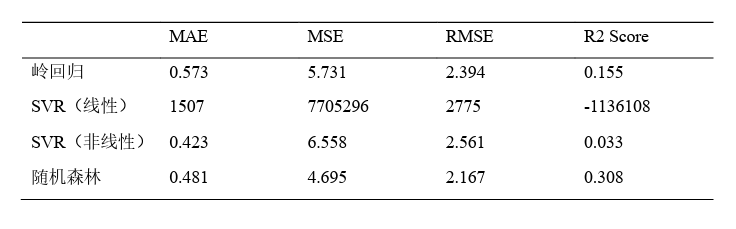

这几个模型表现力都不太好，非要选择的话就是岭回归和随机森林这两个模型